In [1]:
pip install flask pandas numpy scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from flask import Flask

# Create Flask app instance
app = Flask(__name__)


In [3]:
@app.route('/')
def home():
    return "Welcome to SmartRetail!"


In [6]:
pip install gunicorn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [19]:
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)  # Optional: Disable reloader for Jupyter compatibility


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [18]:
# SmartRetail Prototype - Personalized Product Recommendation System

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from flask import Flask, request, render_template

# Load sample data (for demonstration purposes)
# Replace 'customer_data.csv' and 'product_data.csv' with actual data files
customer_data = {
    'customer_id': [1, 2, 3, 4],
    'product_id': [101, 102, 103, 104],
    'purchase_count': [5, 3, 2, 1]
}

data = pd.DataFrame(customer_data)

# Pivot data to create a user-product matrix
user_product_matrix = data.pivot(index='customer_id', columns='product_id', values='purchase_count').fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_product_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_product_matrix.index, columns=user_product_matrix.index)

# Recommendation function
def recommend_products(customer_id, top_n=2):
    # Get similarity scores for the customer
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False)

    # Find products purchased by similar users
    recommendations = pd.Series(dtype=float)
    for user in similar_users.index:
        if user != customer_id:
            user_purchases = user_product_matrix.loc[user]
            recommendations = recommendations.add(user_purchases, fill_value=0)

    # Remove products the customer has already purchased
    customer_purchases = user_product_matrix.loc[customer_id]
    recommendations = recommendations[~recommendations.index.isin(customer_purchases[customer_purchases > 0].index)]

    # Return top N recommended products
    return recommendations.sort_values(ascending=False).head(top_n)

# Flask application
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/recommend', methods=['POST'])
def recommend():
    customer_id = int(request.form['customer_id'])
    recommendations = recommend_products(customer_id)
    return render_template('recommendations.html', customer_id=customer_id, recommendations=recommendations)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\jiten\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Sales Growth vs. Time

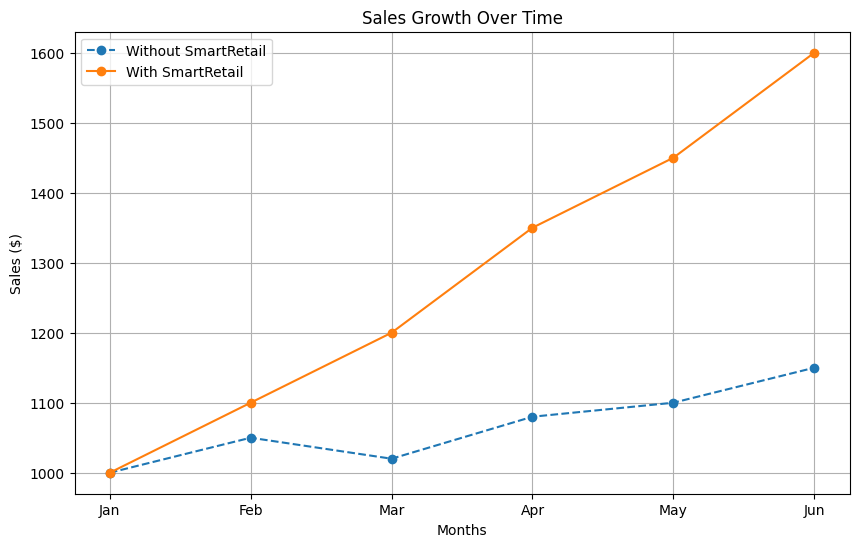

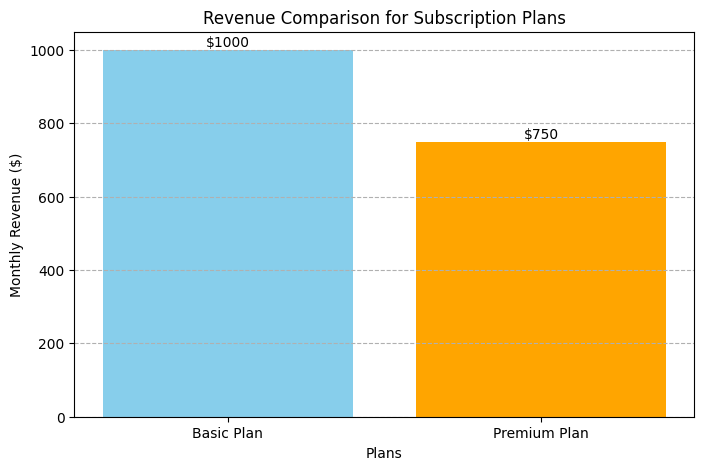

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data for Sales Growth vs. Time
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales_without_smartretail = [1000, 1050, 1020, 1080, 1100, 1150]  # Without SmartRetail
sales_with_smartretail = [1000, 1100, 1200, 1350, 1450, 1600]  # With SmartRetail

# Plotting Sales Growth vs. Time
plt.figure(figsize=(10, 6))
plt.plot(months, sales_without_smartretail, label="Without SmartRetail", marker='o', linestyle='--')
plt.plot(months, sales_with_smartretail, label="With SmartRetail", marker='o', linestyle='-')
plt.title("Sales Growth Over Time")
plt.xlabel("Months")
plt.ylabel("Sales ($)")
plt.legend()
plt.grid(True)
plt.show()

# Sample Data for Revenue Comparison
plans = ['Basic Plan', 'Premium Plan']
prices = [5, 15]  # Price per month
subscribers = [200, 50]  # Hypothetical subscriber numbers
revenues = [p * s for p, s in zip(prices, subscribers)]  # Revenue = Price * Subscribers

# Plotting Revenue Comparison
plt.figure(figsize=(8, 5))
plt.bar(plans, revenues, color=['skyblue', 'orange'])
plt.title("Revenue Comparison for Subscription Plans")
plt.xlabel("Plans")
plt.ylabel("Monthly Revenue ($)")
plt.grid(axis='y', linestyle='--')
for i, revenue in enumerate(revenues):
    plt.text(i, revenue + 10, f"${revenue}", ha='center')
plt.show()
